# Importing Necessary Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [15]:
data = pd.read_csv("/Data.csv")
print(data.shape)
data.head()

(11504798, 12)


id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   0    Male   21                1         35.0                   0   
1   1    Male   43                1         28.0                   0   
2   2  Female   25                1         14.0                   1   
3   3  Female   35                1          1.0                   0   
4   4  Female   36                1         15.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0    1-2 Year            Yes         65101.0                 124.0      187   
1   > 2 Years            Yes         58911.0                  26.0      288   
2    < 1 Year             No         38043.0                 152.0      254   
3    1-2 Year            Yes          2630.0                 156.0       76   
4    1-2 Year             No         31951.0                 152.0      294   

   Response  
0         0  
1         1  
2         0  
3         0  
4         0

In [16]:
data.tail()

id  Gender  Age  Driving_License  Region_Code  \
11504793  11504793    Male   48                1          6.0   
11504794  11504794  Female   26                1         36.0   
11504795  11504795  Female   29                1         32.0   
11504796  11504796  Female   51                1         28.0   
11504797  11504797    Male   25                1         28.0   

          Previously_Insured Vehicle_Age Vehicle_Damage  Annual_Premium  \
11504793                   0    1-2 Year            Yes         27412.0   
11504794                   0    < 1 Year            Yes         29509.0   
11504795                   1    < 1 Year             No          2630.0   
11504796                   0    1-2 Year            Yes         48443.0   
11504797                   1    < 1 Year             No         32855.0   

          Policy_Sales_Channel  Vintage  Response  
11504793                  26.0      218         0  
11504794                 152.0      115         1  
11504795                 152.0      189         0  
11504796                  26.0      274         1  
11504797                 152.0      189         0

# Creating a sample dataset

In [17]:
dummy1 = data.copy()
df1 = dummy1.iloc[:1000,:]
df2 = dummy1.iloc[10005:50000,:]
df3 = df2[(df2["Response"]==1)]
df4 = dummy1.iloc[100005:2000000,:]
df5 = df4[(df4["Driving_License"]==0)]


df= pd.concat([df1,df3], axis=0).reset_index(drop=True)
df= pd.concat([df,df5], axis=0).reset_index(drop=True)
print(df.shape)
# print(df["Response"].value_counts())
# print(df["Driving_License"].value_counts())
df.head()

(9641, 12)


id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   0    Male   21                1         35.0                   0   
1   1    Male   43                1         28.0                   0   
2   2  Female   25                1         14.0                   1   
3   3  Female   35                1          1.0                   0   
4   4  Female   36                1         15.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0    1-2 Year            Yes         65101.0                 124.0      187   
1   > 2 Years            Yes         58911.0                  26.0      288   
2    < 1 Year             No         38043.0                 152.0      254   
3    1-2 Year            Yes          2630.0                 156.0       76   
4    1-2 Year             No         31951.0                 152.0      294   

   Response  
0         0  
1         1  
2         0  
3         0  
4         0

# Exploratory Data Analysis

In [18]:
df.tail()

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
9636  1998744    Male   76                0          8.0                   1   
9637  1998752  Female   72                0         11.0                   1   
9638  1998881    Male   56                0         41.0                   0   
9639  1998953    Male   78                0         28.0                   0   
9640  1999014    Male   64                0         11.0                   0   

     Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
9636    1-2 Year             No         32878.0                  26.0   
9637    1-2 Year             No         34792.0                 120.0   
9638    1-2 Year            Yes         44257.0                  26.0   
9639    1-2 Year            Yes         57479.0                 122.0   
9640    1-2 Year            Yes         52219.0                 124.0   

      Vintage  Response  
9636      288         0  
9637      162         0  
9638      126         0  
9639       70         0  
9640      116         0

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9641 entries, 0 to 9640
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9641 non-null   int64  
 1   Gender                9641 non-null   object 
 2   Age                   9641 non-null   int64  
 3   Driving_License       9641 non-null   int64  
 4   Region_Code           9641 non-null   float64
 5   Previously_Insured    9641 non-null   int64  
 6   Vehicle_Age           9641 non-null   object 
 7   Vehicle_Damage        9641 non-null   object 
 8   Annual_Premium        9641 non-null   float64
 9   Policy_Sales_Channel  9641 non-null   float64
 10  Vintage               9641 non-null   int64  
 11  Response              9641 non-null   int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 904.0+ KB


In [20]:
df.describe()

id          Age  Driving_License  Region_Code  \
count  9.641000e+03  9641.000000      9641.000000  9641.000000   
mean   4.213917e+05    51.233689         0.611866    26.584275   
std    6.039597e+05    15.741660         0.487351    11.925877   
min    0.000000e+00    20.000000         0.000000     0.000000   
25%    2.135900e+04    40.000000         0.000000    20.000000   
50%    4.088000e+04    50.000000         1.000000    28.000000   
75%    7.753390e+05    64.000000         1.000000    29.000000   
max    1.999014e+06    84.000000         1.000000    52.000000   

       Previously_Insured  Annual_Premium  Policy_Sales_Channel      Vintage  \
count         9641.000000     9641.000000           9641.000000  9641.000000   
mean             0.171144    31994.322788             80.984338   162.969713   
std              0.376654    17760.395517             55.774117    79.448993   
min              0.000000     2630.000000              1.000000    10.000000   
25%              0.000000    25343.000000             26.000000   100.000000   
50%              0.000000    34137.000000            122.000000   163.000000   
75%              0.000000    44321.000000            124.000000   232.000000   
max              1.000000   289606.000000            163.000000   299.000000   

          Response  
count  9641.000000  
mean      0.541334  
std       0.498314  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       1.000000  
max       1.000000

In [21]:
# ID column contain unique value, don't contain any information

df = df.drop(columns=["id"])
print(df.shape)
df.head()

(9641, 11)


Gender  Age  Driving_License  Region_Code  Previously_Insured Vehicle_Age  \
0    Male   21                1         35.0                   0    1-2 Year   
1    Male   43                1         28.0                   0   > 2 Years   
2  Female   25                1         14.0                   1    < 1 Year   
3  Female   35                1          1.0                   0    1-2 Year   
4  Female   36                1         15.0                   1    1-2 Year   

  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  Response  
0            Yes         65101.0                 124.0      187         0  
1            Yes         58911.0                  26.0      288         1  
2             No         38043.0                 152.0      254         0  
3            Yes          2630.0                 156.0       76         0  
4             No         31951.0                 152.0      294         0

# Checking for Null Values

In [22]:
#checking missing values

df.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [23]:
#Numeric fetures
numerical_features  = df.select_dtypes(include=["int64","float64"])
numerical_features.head()

Age  Driving_License  Region_Code  Previously_Insured  Annual_Premium  \
0   21                1         35.0                   0         65101.0   
1   43                1         28.0                   0         58911.0   
2   25                1         14.0                   1         38043.0   
3   35                1          1.0                   0          2630.0   
4   36                1         15.0                   1         31951.0   

   Policy_Sales_Channel  Vintage  Response  
0                 124.0      187         0  
1                  26.0      288         1  
2                 152.0      254         0  
3                 156.0       76         0  
4                 152.0      294         0

# Heatmap to understand correlation between variables

<Axes: >

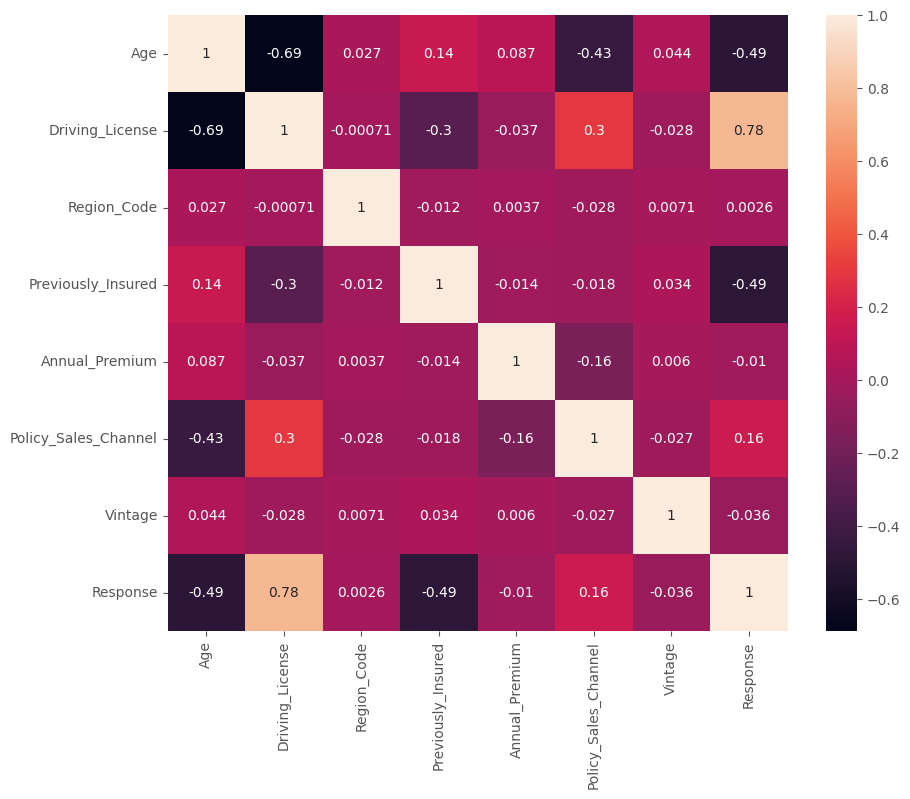

In [24]:
plt.style.use("ggplot")
plt.figure(figsize=[10,8])
sns.heatmap(numerical_features.corr(), annot=True)

In [25]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

continuous_feature = [i for i in numerical_features.columns if numerical_features[i].unique().sum()>25]
print("continuous_feature : {}".format(continuous_feature))

continuous_feature : ['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']


<ipython-input-26-6f7c1854231a>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(numerical_features[feature],bins=25,edgecolor='k',palette='set1')


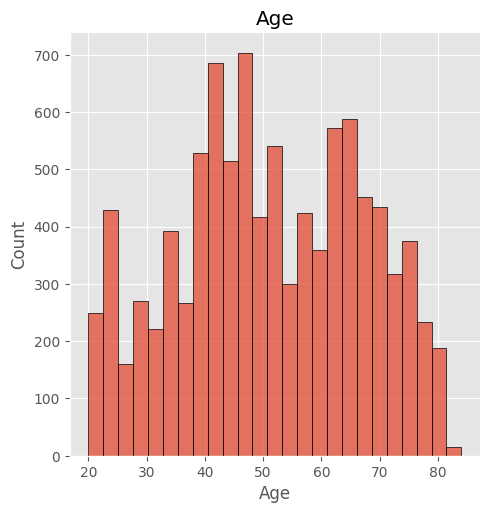

<ipython-input-26-6f7c1854231a>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(numerical_features[feature],bins=25,edgecolor='k',palette='set1')


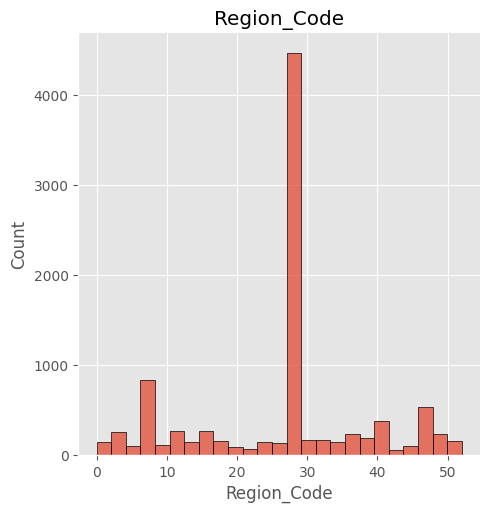

<ipython-input-26-6f7c1854231a>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(numerical_features[feature],bins=25,edgecolor='k',palette='set1')


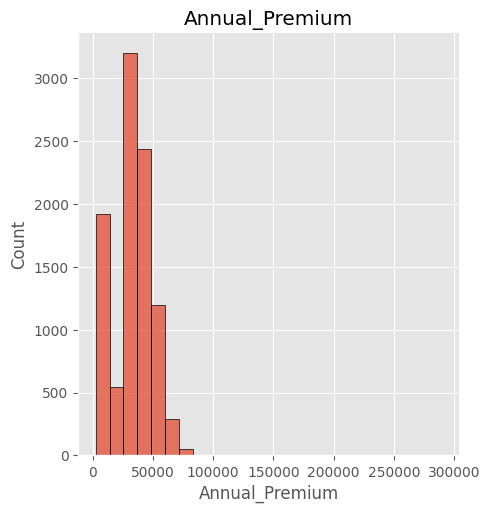

<ipython-input-26-6f7c1854231a>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(numerical_features[feature],bins=25,edgecolor='k',palette='set1')


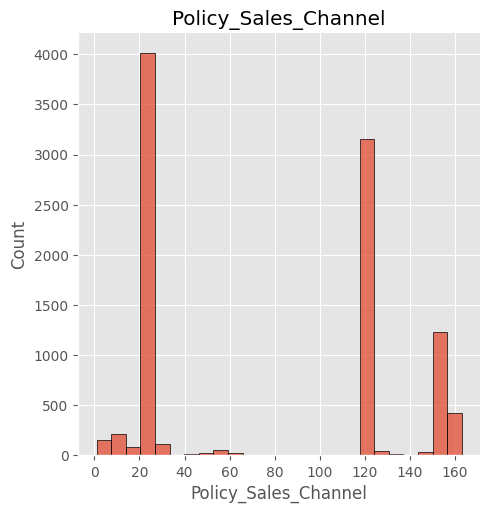

<ipython-input-26-6f7c1854231a>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(numerical_features[feature],bins=25,edgecolor='k',palette='set1')


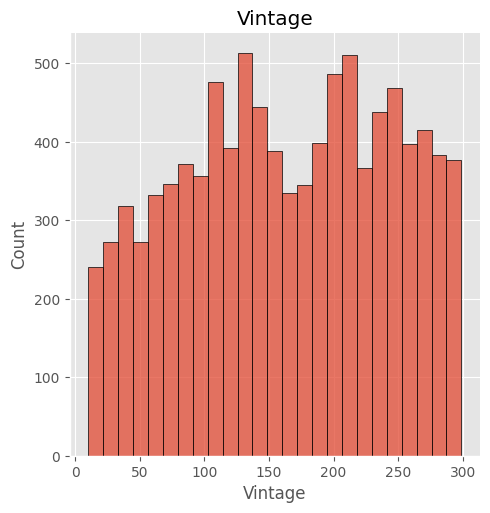

In [26]:
## Analysing the continuous features by creating histograms to understand the distribution

for feature in continuous_feature:
    sns.displot(numerical_features[feature],bins=25,edgecolor='k',palette='set1')
    plt.title(feature)
    plt.show();

In [27]:
#Discrete Variables

discrete_var = [i for i in numerical_features.columns if i not in continuous_feature]
print("Discrete Variables : {}".format(discrete_var))

Discrete Variables : ['Driving_License', 'Previously_Insured', 'Response']


Driving_License
1    5899
0    3742
Name: count, dtype: int64


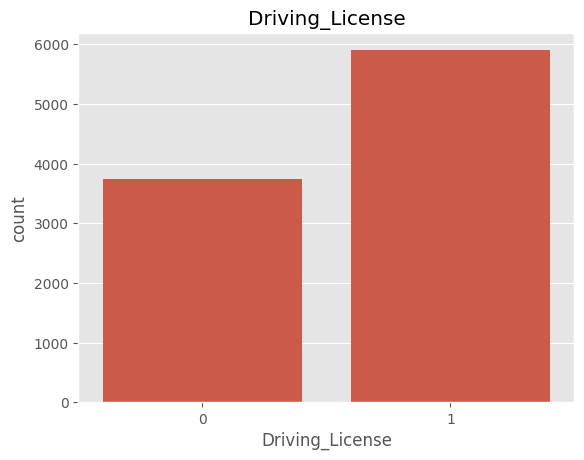

Previously_Insured
0    7991
1    1650
Name: count, dtype: int64


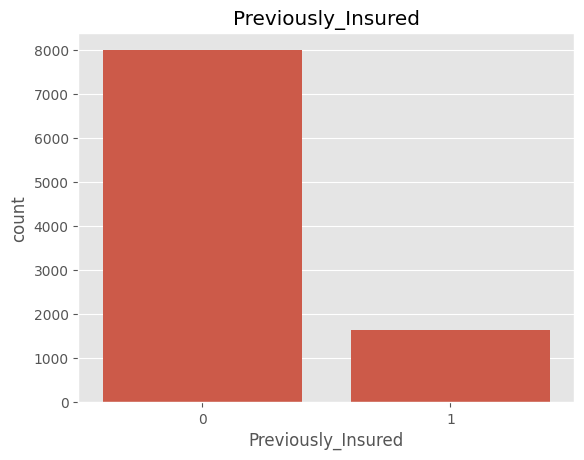

Response
1    5219
0    4422
Name: count, dtype: int64


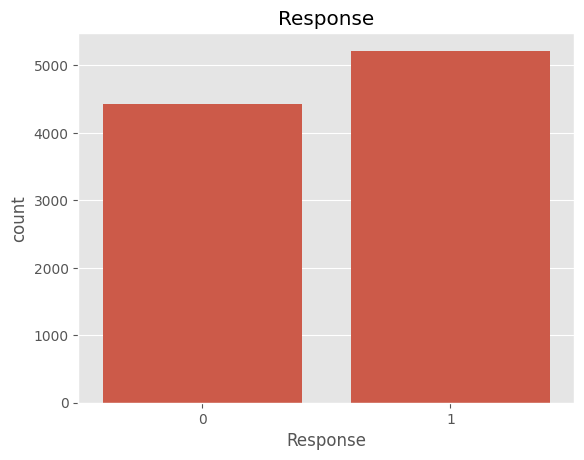

In [28]:
for feature in discrete_var:
    res = numerical_features[feature].value_counts()
    print(res)
    sns.barplot(res)
    plt.title(feature)
    plt.show()

In [29]:
# Categorical features

categorical_features = [i for i in df.columns if i not in numerical_features]
print("Categorical Features : {}".format(categorical_features))

Categorical Features : ['Gender', 'Vehicle_Age', 'Vehicle_Damage']


Gender
Male      6418
Female    3223
Name: count, dtype: int64


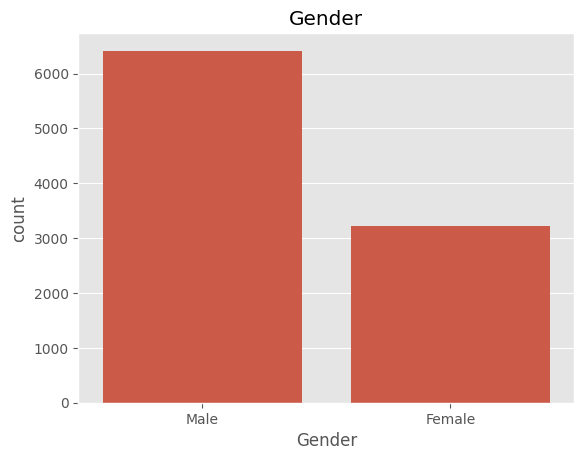

Vehicle_Age
1-2 Year     7688
< 1 Year     1168
> 2 Years     785
Name: count, dtype: int64


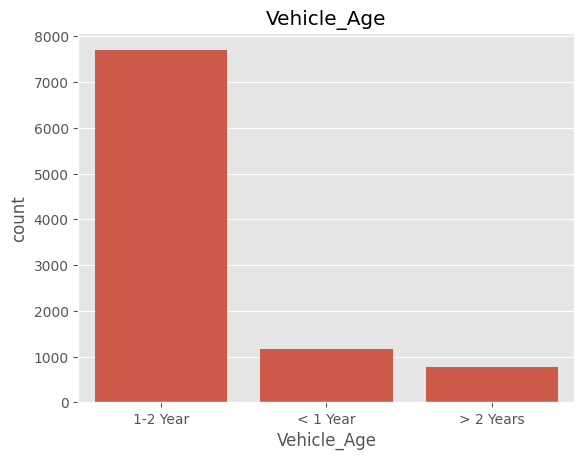

Vehicle_Damage
Yes    7860
No     1781
Name: count, dtype: int64


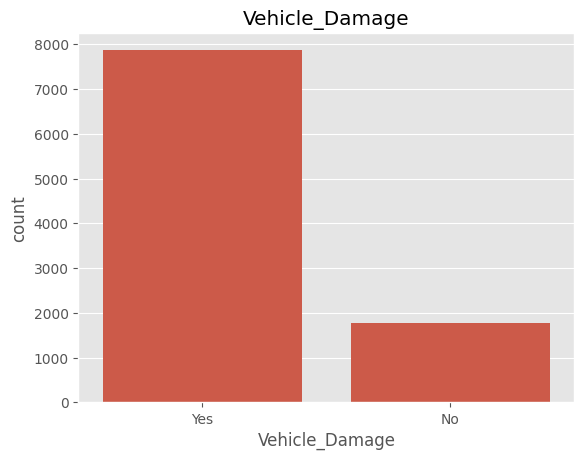

In [30]:
for feature in categorical_features:
    res = df[feature].value_counts()
    print(res)
    sns.barplot(res)
    plt.title(feature)
    plt.show()

In [31]:
# Response column is dependent feature

numerical_features = numerical_features.drop(columns=["Response"])
print(numerical_features.shape)
numerical_features.head()


(9641, 7)


Age  Driving_License  Region_Code  Previously_Insured  Annual_Premium  \
0   21                1         35.0                   0         65101.0   
1   43                1         28.0                   0         58911.0   
2   25                1         14.0                   1         38043.0   
3   35                1          1.0                   0          2630.0   
4   36                1         15.0                   1         31951.0   

   Policy_Sales_Channel  Vintage  
0                 124.0      187  
1                  26.0      288  
2                 152.0      254  
3                 156.0       76  
4                 152.0      294

# One Hot Encoding


In [32]:
# handling categorical data
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform="pandas")
categorical_features_tras = ohe.fit_transform(df[categorical_features])


In [33]:
categorical_features_tras.head()

Gender_Female  Gender_Male  Vehicle_Age_1-2 Year  Vehicle_Age_< 1 Year  \
0            0.0          1.0                   1.0                   0.0   
1            0.0          1.0                   0.0                   0.0   
2            1.0          0.0                   0.0                   1.0   
3            1.0          0.0                   1.0                   0.0   
4            1.0          0.0                   1.0                   0.0   

   Vehicle_Age_> 2 Years  Vehicle_Damage_No  Vehicle_Damage_Yes  
0                    0.0                0.0                 1.0  
1                    1.0                0.0                 1.0  
2                    0.0                1.0                 0.0  
3                    0.0                0.0                 1.0  
4                    0.0                1.0                 0.0

In [34]:
# Concatinating numeric and categorical features

final_df = pd.concat([numerical_features,categorical_features_tras],axis=1)
print(final_df.shape)
final_df.head()

(9641, 14)


Age  Driving_License  Region_Code  Previously_Insured  Annual_Premium  \
0   21                1         35.0                   0         65101.0   
1   43                1         28.0                   0         58911.0   
2   25                1         14.0                   1         38043.0   
3   35                1          1.0                   0          2630.0   
4   36                1         15.0                   1         31951.0   

   Policy_Sales_Channel  Vintage  Gender_Female  Gender_Male  \
0                 124.0      187            0.0          1.0   
1                  26.0      288            0.0          1.0   
2                 152.0      254            1.0          0.0   
3                 156.0       76            1.0          0.0   
4                 152.0      294            1.0          0.0   

   Vehicle_Age_1-2 Year  Vehicle_Age_< 1 Year  Vehicle_Age_> 2 Years  \
0                   1.0                   0.0                    0.0   
1                   0.0                   0.0                    1.0   
2                   0.0                   1.0                    0.0   
3                   1.0                   0.0                    0.0   
4                   1.0                   0.0                    0.0   

   Vehicle_Damage_No  Vehicle_Damage_Yes  
0                0.0                 1.0  
1                0.0                 1.0  
2                1.0                 0.0  
3                0.0                 1.0  
4                1.0                 0.0

In [35]:
# Independent and Dependent Features
x = final_df
y = df["Response"]

# Dividing the data into train and test sets

In [36]:
from sklearn.model_selection import train_test_split

#Spliting the data for train and test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7230, 14), (2411, 14), (7230,), (2411,))

# Scaling the data

In [37]:
#Scaling the Independent Train data

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
# col = x_train.columns
x_train = pd.DataFrame(scale.fit_transform(x_train), columns=x_train.columns)
x_train.head()

Age  Driving_License  Region_Code  Previously_Insured  Annual_Premium  \
0 -0.090136         0.797105     0.110200           -0.454321        0.655244   
1 -0.346353         0.797105     0.110200           -0.454321        1.835588   
2 -0.986894         0.797105     0.110200           -0.454321        0.777720   
3 -0.410407         0.797105     0.110200           -0.454321        0.653551   
4  1.575271        -1.254540     1.959387            2.201087       -0.385014   

   Policy_Sales_Channel   Vintage  Gender_Female  Gender_Male  \
0             -0.982687  0.506829      -0.713277     0.713277   
1             -1.377713  1.235458      -0.713277     0.713277   
2              0.776974 -0.435363       1.401979    -1.401979   
3             -0.982687  1.021894       1.401979    -1.401979   
4             -1.305890 -1.163992      -0.713277     0.713277   

   Vehicle_Age_1-2 Year  Vehicle_Age_< 1 Year  Vehicle_Age_> 2 Years  \
0              0.493074             -0.362079              -0.294218   
1              0.493074             -0.362079              -0.294218   
2              0.493074             -0.362079              -0.294218   
3              0.493074             -0.362079              -0.294218   
4              0.493074             -0.362079              -0.294218   

   Vehicle_Damage_No  Vehicle_Damage_Yes  
0          -0.476319            0.476319  
1          -0.476319            0.476319  
2          -0.476319            0.476319  
3          -0.476319            0.476319  
4           2.099435           -2.099435

In [38]:
#Scaling the Independent Test data
x_test =  pd.DataFrame(scale.transform(x_test), columns=x_train.columns)
x_test.head()

Age  Driving_License  Region_Code  Previously_Insured  Annual_Premium  \
0  1.767433        -1.254540     0.110200           -0.454321       -0.180473   
1 -1.627435         0.797105     1.202901            2.201087        0.103141   
2  0.102026         0.797105     1.623171           -0.454321       -1.668306   
3  0.550405         0.797105    -0.478177           -0.454321        0.209419   
4  0.870675        -1.254540     0.110200           -0.454321       -1.668306   

   Policy_Sales_Channel   Vintage  Gender_Female  Gender_Male  \
0             -1.000643 -0.334863       1.401979    -1.401979   
1              1.279734 -1.817245      -0.713277     0.713277   
2             -0.982687  0.029452      -0.713277     0.713277   
3             -0.695396 -0.033361       1.401979    -1.401979   
4             -0.982687 -0.988116       1.401979    -1.401979   

   Vehicle_Age_1-2 Year  Vehicle_Age_< 1 Year  Vehicle_Age_> 2 Years  \
0              0.493074             -0.362079              -0.294218   
1             -2.028091              2.761826              -0.294218   
2             -2.028091             -0.362079               3.398836   
3              0.493074             -0.362079              -0.294218   
4              0.493074             -0.362079              -0.294218   

   Vehicle_Damage_No  Vehicle_Damage_Yes  
0          -0.476319            0.476319  
1           2.099435           -2.099435  
2          -0.476319            0.476319  
3          -0.476319            0.476319  
4          -0.476319            0.476319

# Trying different ML Models and Hyperparameters


In [39]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Logistic Regression

In [40]:
#Logistic regression with Hyperparameter tunning
final={}
model1= LogisticRegression()
param1={"C":np.logspace(-3,3,7), "penalty":["l1","l2"],'solver':['lbfgs', 'liblinear', 'sag', 'saga']}
# param1={"penalty":["l1","l2"], 'solver':['lbfgs', 'liblinear']}
model1_GCV= GridSearchCV(model1,param1, cv=10, verbose=1)
model1_GCV.fit(x_train, y_train)

Fitting 10 folds for each of 56 candidates, totalling 560 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             verbose=1)

In [41]:
print("Best parameter : {} ".format(model1_GCV.best_estimator_))

Best parameter : LogisticRegression(C=0.01, penalty='l1', solver='saga') 


In [42]:
pred1=model1_GCV.predict(x_test)
final[type(model1).__name__]= accuracy_score(pred1, y_test)
print("Accuracy (Logistic Regression) : {} ".format(accuracy_score(pred1, y_test)))

Accuracy (Logistic Regression) : 0.9390294483616757 


Confusion Matrix : 


<Axes: >

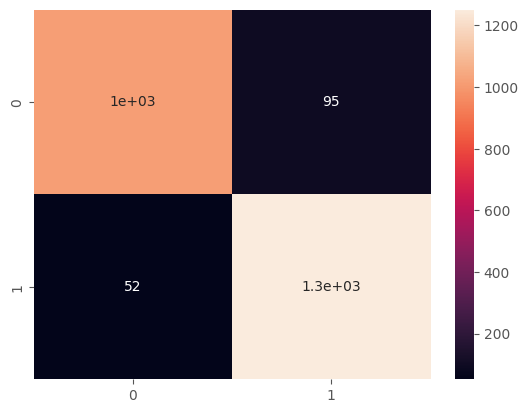

In [43]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix : ")
sns.heatmap(confusion_matrix(y_test, pred1), annot=True)

model 1 AUC score: 0.9371760114814188


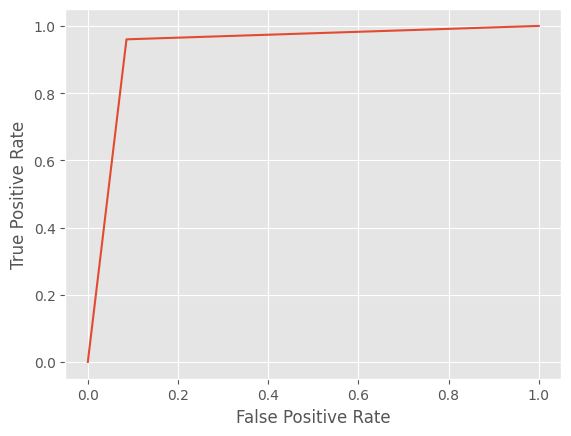

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(y_test, pred1)
print(f'model 1 AUC score: {roc_auc_score(y_test,pred1 )}')

# Random Forest Classifier

In [45]:
#RandomForestClassifier with Hyperparameter tunning

model2= RandomForestClassifier()
param2={'criterion':['gini', 'entropy'],
        'n_estimators':[100,200,300],
        'max_depth':[1,2,3,4],
        'bootstrap':[True, False]
       }
model2_GCV= GridSearchCV(model2,param2, cv=10, verbose=1)
model2_GCV.fit(x_train, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4],
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [46]:
print("Best parameter : {} ".format(model2_GCV.best_estimator_))

Best parameter : RandomForestClassifier(max_depth=4, n_estimators=300) 


In [47]:
pred2=model2_GCV.predict(x_test)
final[type(model2).__name__]= accuracy_score(pred2, y_test)
print("Accuracy (Random Forest Classifier) : {} ".format(accuracy_score(pred2, y_test)))

Accuracy (Random Forest Classifier) : 0.9332227291580257 


Confusion Matrix : 


<Axes: >

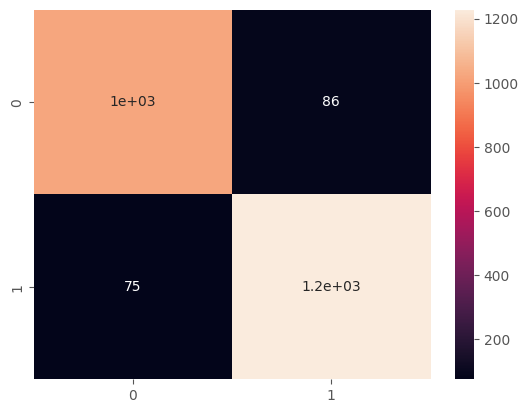

In [48]:
print("Confusion Matrix : ")
sns.heatmap(confusion_matrix(y_test, pred2), annot=True)

model 2 AUC score: 0.932411596676373


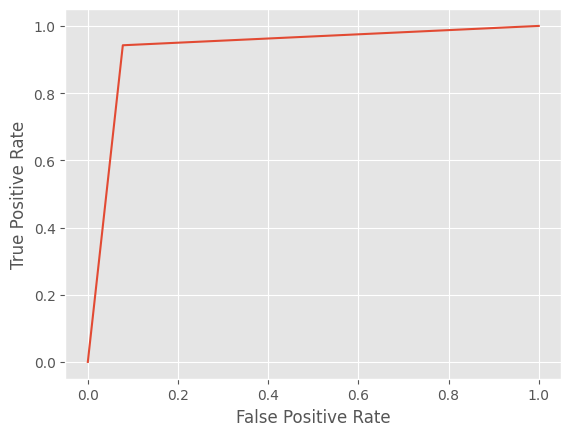

In [49]:
plot_roc_curve(y_test, pred2)
print(f'model 2 AUC score: {roc_auc_score(y_test,pred2 )}')

# AdaBoost


In [50]:
#Adaboost with Hyperparameter tunning

model3= AdaBoostClassifier(DecisionTreeClassifier(max_depth=1))
param3= {
         'n_estimators':[100,200,300],
         'learning_rate':[0.01, 0.1, 1, 10, 100 ],
         'algorithm':['SAMME', 'SAMME.R']
        }
model3_GCV= GridSearchCV(model3,param3, cv=10, verbose=1)
model3_GCV.fit(x_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:703: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:703: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:703: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/lib/python3.10/dist-packa

GridSearchCV(cv=10,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1)),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.01, 0.1, 1, 10, 100],
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [51]:
print("Best parameter : {} ".format(model3_GCV.best_estimator_))

Best parameter : AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.1, n_estimators=200) 


In [52]:
pred3 =model3_GCV.predict(x_test)
final[type(model3).__name__]= accuracy_score(pred3, y_test)
print("Accuracy (AdaBoostClassifier) : {} ".format(accuracy_score(pred3, y_test)))

Accuracy (AdaBoostClassifier) : 0.9390294483616757 


Confusion Matrix : 


<Axes: >

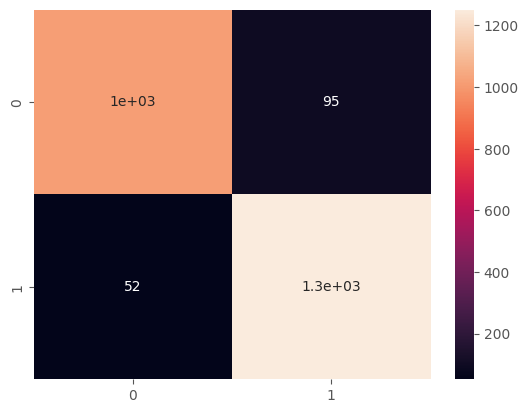

In [53]:
print("Confusion Matrix : ")
sns.heatmap(confusion_matrix(y_test, pred3), annot=True)

model 3 AUC score: 0.9371760114814188


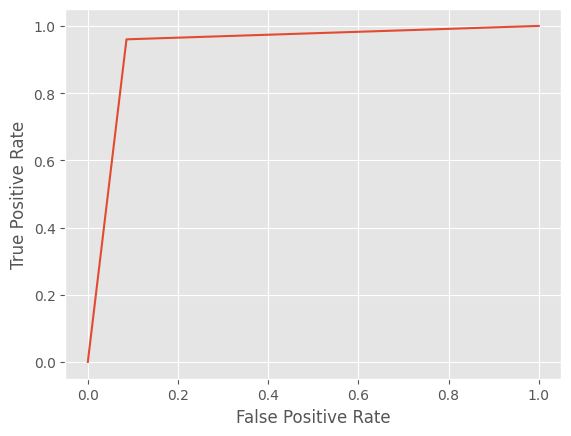

In [54]:
plot_roc_curve(y_test, pred3)
print(f'model 3 AUC score: {roc_auc_score(y_test,pred3)}')

# Gradient Boosting

In [55]:
#GradientBoostingClassifier with Hyperparameter tunning

model4 =GradientBoostingClassifier()
param4= {'max_depth':[1,2,3],
         'n_estimators':[100,200,300],
         'learning_rate':[0.01, 0.1, 1, 10,100 ]
        }
model4_GCV= GridSearchCV(model4,param4, cv=10, verbose=1)
model4_GCV.fit(x_train, y_train)

Fitting 10 folds for each of 45 candidates, totalling 450 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10, 100],
                         'max_depth': [1, 2, 3],
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [56]:
print("Best parameter : {} ".format(model4_GCV.best_estimator_))

Best parameter : GradientBoostingClassifier(learning_rate=0.01, max_depth=2) 


In [57]:
pred4 =model4_GCV.predict(x_test)
final[type(model4).__name__]= accuracy_score(pred4, y_test)
print("Accuracy (GradientBoostingClassifier) : {} ".format(accuracy_score(pred4, y_test)))

Accuracy (GradientBoostingClassifier) : 0.9390294483616757 


Confusion Matrix : 


<Axes: >

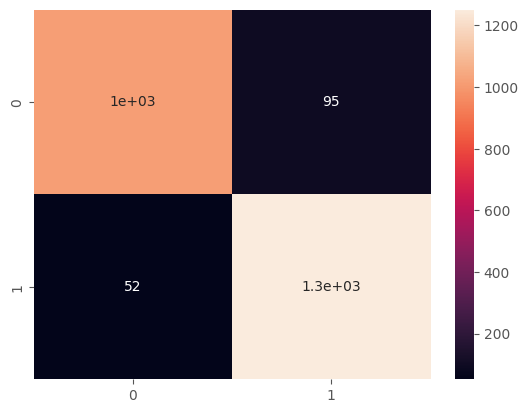

In [58]:
print("Confusion Matrix : ")
sns.heatmap(confusion_matrix(y_test, pred4), annot=True)

model 4 AUC score: 0.9371760114814188


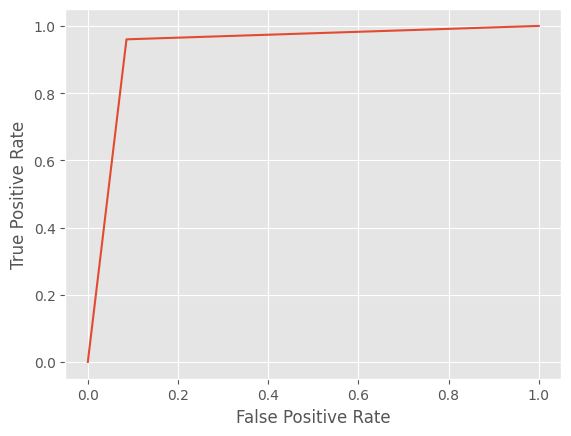

In [59]:
plot_roc_curve(y_test, pred4)
print(f'model 4 AUC score: {roc_auc_score(y_test,pred4)}')

# Support Vector Machine

In [60]:
#SVC with Hyperparameter tunning

model5= SVC()
param5= {'C':[0.05,0.1,1,10,100],
         'gamma':[0.05,0.1,1,10,100]
        }
model5_GCV= GridSearchCV(model5,param5, cv=10, verbose=1)
model5_GCV.fit(x_train, y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.05, 0.1, 1, 10, 100],
                         'gamma': [0.05, 0.1, 1, 10, 100]},
             verbose=1)

In [61]:
print("Best parameter : {} ".format(model5_GCV.best_estimator_))

Best parameter : SVC(C=10, gamma=0.05) 


In [62]:
pred5 =model5_GCV.predict(x_test)
final[type(model5).__name__]= accuracy_score(pred5, y_test)
print("Accuracy (SVC) : {} ".format(accuracy_score(pred5, y_test)))

Accuracy (SVC) : 0.9377851513894649 


<Axes: >

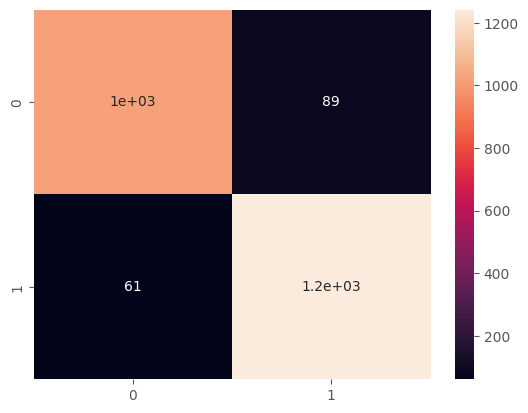

In [63]:
sns.heatmap(confusion_matrix(y_test, pred5), annot=True)

model 5 AUC score: 0.9364300240212117


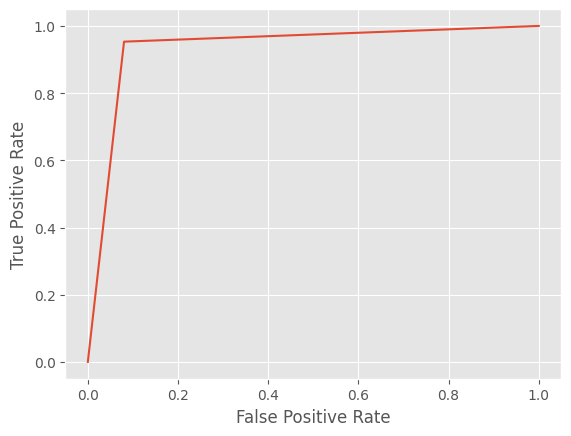

In [64]:
plot_roc_curve(y_test, pred5)
print(f'model 5 AUC score: {roc_auc_score(y_test,pred5)}')

# XG-Boost

In [65]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [2,3, 4]
        }

xgb = XGBClassifier()

model6_GCV = RandomizedSearchCV(estimator=xgb,
            param_distributions=params,
            cv=5, n_iter=10,
            scoring = 'roc_auc',n_jobs = 4,
            verbose = 1,
            return_train_score = True,
            random_state=42)

model6_GCV.fit(x_train.values,y_train.values)



Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_jobs=4,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'max_depth': [2, 3, 4],
                                        'min_child_weight': [1, 5, 10],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, return_train_score=True, scoring='roc_auc',
                   verbose=1)

In [66]:
print("Best parameter : {} ".format(model6_GCV.best_estimator_))

Best parameter : XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) 


In [67]:
pred6 =model6_GCV.predict(x_test)
final[type(model5).__name__]= accuracy_score(pred6, y_test)
print("Accuracy (XGboost) : {} ".format(accuracy_score(pred6, y_test)))

Accuracy (XGboost) : 0.9381999170468686 


Confusion Matrix : 


<Axes: >

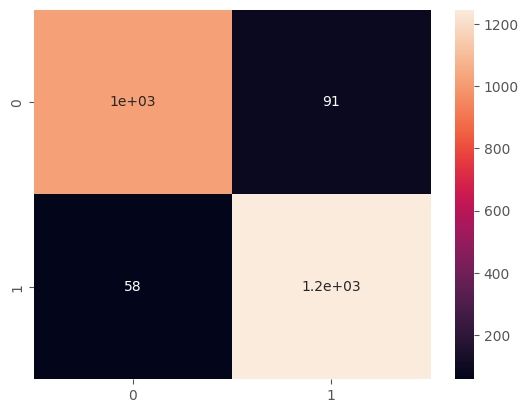

In [68]:
print("Confusion Matrix : ")
sns.heatmap(confusion_matrix(y_test, pred6), annot=True)

model 6 AUC score: 0.9366786865079475


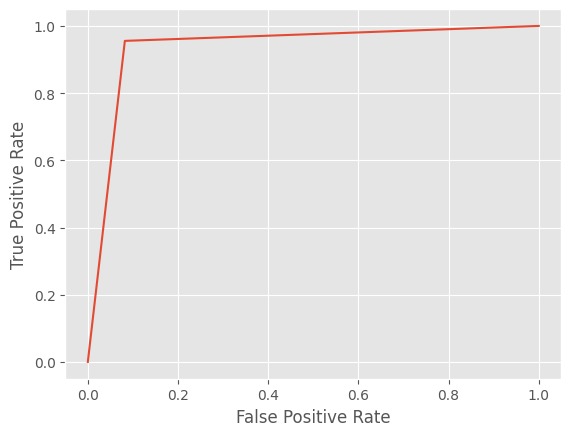

In [69]:
plot_roc_curve(y_test, pred6)
print(f'model 6 AUC score: {roc_auc_score(y_test,pred6 )}')

# Neural Network

In [72]:
import keras_tuner
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam, SGD

# using keras_tuner for creating ANN with Better accuracy

def creat_model(hp):
  model = Sequential()
  for i in range(hp.Int("num_layers",2,10)):
    model.add(Dense(hp.Int("num_neurons", min_value = 32, max_value = 256, step = 32), activation= 'relu'))
  model.add(Dense(1, activation="sigmoid"))
  # Change metrics to a list
  model.compile(optimizer = keras.optimizers.Adam(0.01), loss = "binary_crossentropy", metrics = ["accuracy"])
  return model

model7 = keras_tuner.RandomSearch(creat_model, objective = "val_accuracy", max_trials = 5,
                                 executions_per_trial=3,
                                directory='project_01',
                                  project_name='Air Quality Index_01')
model7.search_space_summary()

Search space summary
Default search space size: 2
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': 'linear'}
num_neurons (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}


In [73]:
model7.search(x_train, y_train, epochs =5,
             validation_data=(x_test,y_test))

Trial 5 Complete [00h 00m 27s]
val_accuracy: 0.9397207101186117

Best val_accuracy So Far: 0.9397207101186117
Total elapsed time: 00h 03m 02s


In [74]:
pred = model7.get_best_models(num_models=1)[0].predict(x_test)
pred7 = np.where(pred>0.5,1,0)
final["ANN"]= accuracy_score(pred7, y_test)
print("Accuracy (ANN) : {} ".format(accuracy_score(pred7, y_test)))

 1/76 ━━━━━━━━━━━━━━━━━━━━ 8s 112ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy (ANN) : 0.9402737453338863 


Confusion Matrix : 


<Axes: >

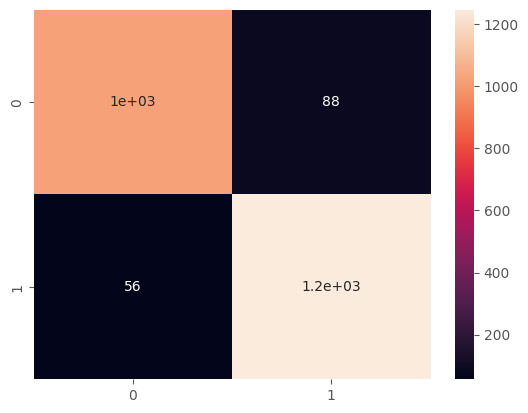

In [75]:
print("Confusion Matrix : ")
sns.heatmap(confusion_matrix(y_test, pred7), annot=True)

model 7 AUC score: 0.9387999368300312


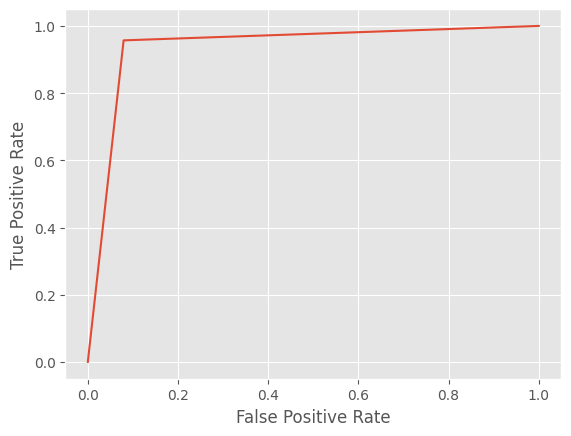

In [83]:
plot_roc_curve(y_test, pred7)
print(f'model 7 AUC score: {roc_auc_score(y_test,pred7 )}')

# Convolutional Neural Network

In [78]:
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.optimizers import Adam

x_train_cnn = x_train.values.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test_cnn = x_test.values.reshape(x_test.shape[0], x_test.shape[1], 1)

model8 = Sequential()
model8.add(Conv1D(64, 3, activation='relu', input_shape=(x_train_cnn.shape[1], x_train_cnn.shape[2])))
# model.add(MaxPooling1D(2))
model8.add(Conv1D(128, 3, activation='relu'))
# model.add(MaxPooling1D(2))
model8.add(Conv1D(256, 3, activation='relu'))
# model.add(MaxPooling1D(2))
model8.add(Flatten())
model8.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
model8.add(Dense(1, activation='sigmoid'))

model8.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(0.01), metrics=['accuracy'])

# Train model
history = model8.fit(x_train_cnn, y_train, batch_size=32, epochs=15, validation_data=(x_test_cnn,y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
226/226 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.8661 - loss: 0.4042 - val_accuracy: 0.9378 - val_loss: 0.2148
Epoch 2/15
226/226 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.9299 - loss: 0.2411 - val_accuracy: 0.9390 - val_loss: 0.2154
Epoch 3/15
226/226 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.9295 - loss: 0.2355 - val_accuracy: 0.9390 - val_loss: 0.2175
Epoch 4/15
226/226 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.9302 - loss: 0.2377 - val_accuracy: 0.9357 - val_loss: 0.2254
Epoch 5/15
226/226 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9309 - loss: 0.2345 - val_accuracy: 0.9370 - val_loss: 0.2228
Epoch 6/15
226/226 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9280 - loss: 0.2379 - val_accuracy: 0.9378 - val_loss: 0.2290
Epoch 7/15
226/226 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9304 - loss: 0.2369 - val_accuracy: 0.9394 - val_loss: 0.2167
Epoch 8/15
226/226 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9321 - loss: 0.2310 - val_ac

In [79]:
pred = model8.predict(x_test_cnn)
pred8 = np.where(pred>0.5,1,0)
final["CNN"]= accuracy_score(pred8, y_test)

76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


Confusion Matrix : 


<Axes: >

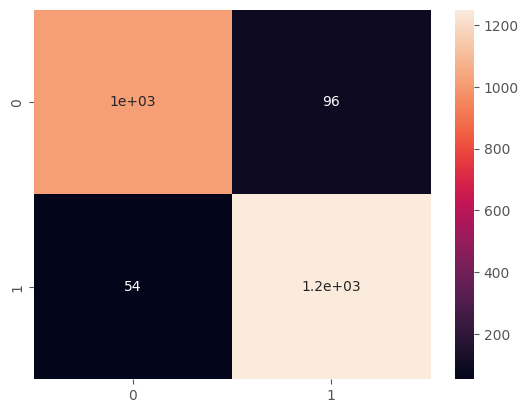

In [80]:
print("Confusion Matrix : ")
sns.heatmap(confusion_matrix(y_test, pred8), annot=True)

model 8 AUC score: 0.9359572882351475


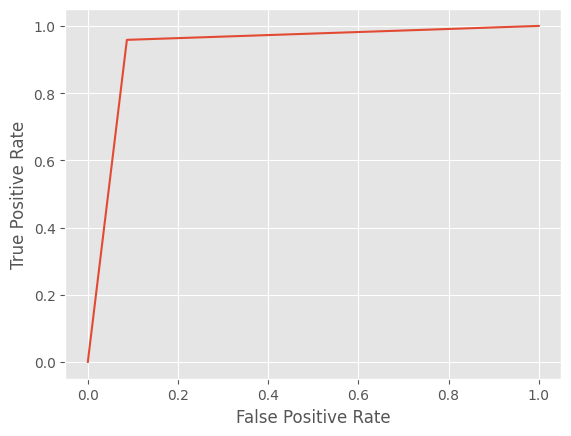

In [81]:
plot_roc_curve(y_test, pred8)
print(f'model 8 AUC score: {roc_auc_score(y_test,pred8)}')

# Comparative Analysis

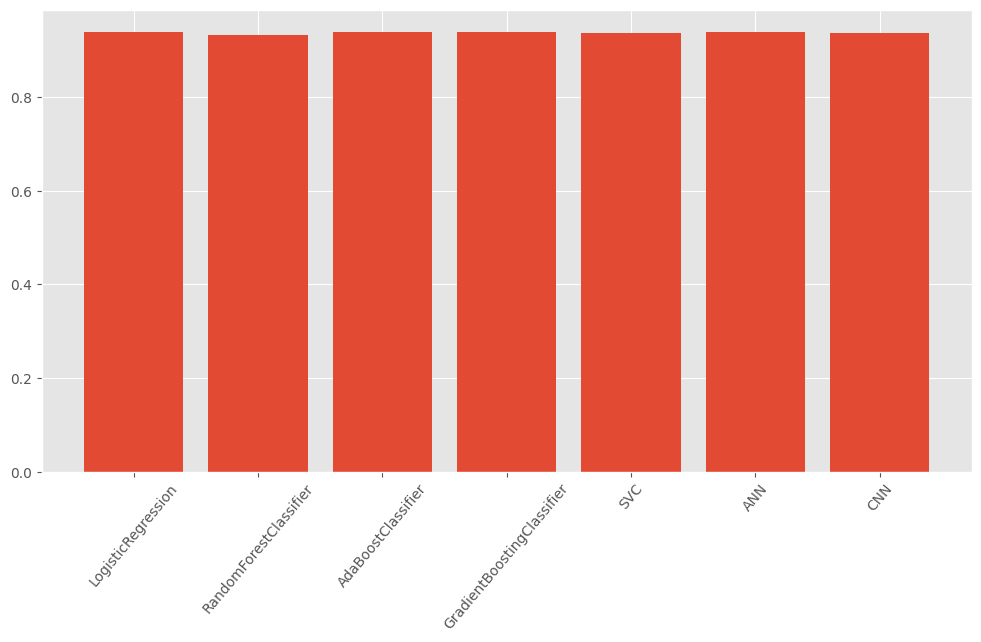

In [82]:
plt.figure(figsize=[12,6])
plt.bar(final.keys(), final.values())
plt.xticks(rotation=50,fontsize=10);

# Observations

1. From the above analysis, we can observe that Neural Network shows the best performance.
2. Performances are similar for all other models given the feature set.
